In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# loads the ideal data
data=np.loadtxt('./13.dat')

In [32]:
# time range of experiment: we use 20 to 1999 for whatever physical reason
#  but you can try other times
t_min = 200
t_max = 1999

The goal is to pug in the ratios between the pressure at each probe and the total pressure and return two centroids of two clusters: one centroid will have a higher slope than the other. The centroid with the higher slope corresponds to the non ideal cluster.

The reatios are ploted here

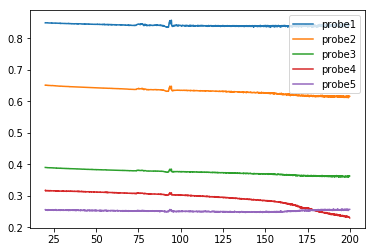

In [33]:
Ptot=data[t_min:t_max,1] # total pressure
P1=data[t_min:t_max,5] # 1 probe
P2=data[t_min:t_max,6] # 2 ...
P3=data[t_min:t_max,7]
P4=data[t_min:t_max,8]
P5=data[t_min:t_max,9]

t = data[t_min:t_max,0] # times

P = [P1/Ptot, P2/Ptot, P3/Ptot, P4/Ptot, P5/Ptot]

# plotting
i = 1
for ratios in P:
    
    ax = plt.plot(t, ratios, label = 'probe' + str(i))
    i +=1

plt.legend()
plt.show()

We want to cluster. The clustering finds the two mean functions among these 5 functions. Obviously here we will have a bad clustering:

[0 0 1 1 1]


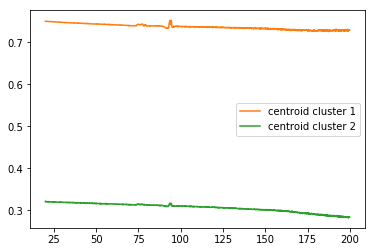

In [34]:
kmeans_bad = KMeans(n_clusters=2).fit(P)
labels = kmeans_bad.labels_
print(labels)


c1 = kmeans_bad.cluster_centers_[0]
c2 = kmeans_bad.cluster_centers_[1] 
plt.plot(t, c1,'C1', label = 'centroid cluster 1')
plt.plot(t, c2,'C2', label = 'centroid cluster 2')
plt.legend()
plt.show()

We need to re-write the data such that it all starts at the same point. This way the only thing that will distiguish the functions are their slope, and not also their mean

In [35]:
num_prob = 5
for i in range(num_prob):
	P[i] = np.divide(P[i],P[i][0])
    
P_ratio = P

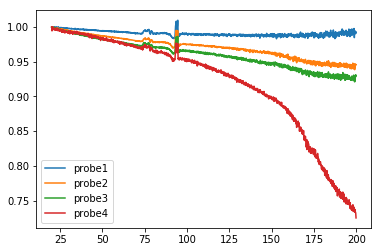

In [36]:
# plotting
i = 1
for ratios in P_ratio[0:-1]:
	
	ax = plt.plot(t, ratios, label = 'probe' + str(i))
	i +=1

ax = plt.legend()
ax = plt.show()

[0 0 0 1 0]


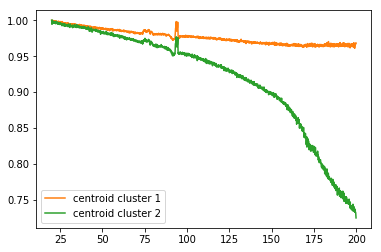

In [37]:
kmeans = KMeans(n_clusters=2).fit(P_ratio)
labels = kmeans.labels_
print(labels)

fig, ax = plt.subplots()

c1 = kmeans.cluster_centers_[0]
c2 = kmeans.cluster_centers_[1] 
plt.plot(t, c1,'C1', label = 'centroid cluster 1')
plt.plot(t, c2,'C2', label = 'centroid cluster 2')
plt.legend()
plt.show()

The k means classifies the probe 4 as non ideal the rest of the probes ideal for t_min =20 and t_max = 1999